# Regression with Panel Data

## 10.1 Panel Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Fatalities.csv")

In [3]:
df

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,...,32,309.437988,3.942002e+06,208999.593750,221553.437500,290000.062500,28516.0,9.7,57.799999,-0.022125
1,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,...,35,341.834015,3.960008e+06,202000.078125,219125.468750,290000.156250,31032.0,9.6,57.900002,0.046558
2,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,...,34,304.872009,3.988992e+06,196999.968750,216724.093750,288000.156250,32961.0,7.5,59.500004,0.062798
3,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,...,45,276.742004,4.021008e+06,194999.734375,214349.031250,284000.312500,35091.0,7.2,60.100002,0.027490
4,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,...,29,360.716003,4.049994e+06,203999.890625,212000.000000,263000.281250,36259.0,7.0,60.700001,0.032143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,wy,1984,1.91,6.3,13456.043945,66.022095,0.049451,2.630720,8.55593,19.00,...,3,62.278999,5.129998e+05,21999.941406,24821.398438,36999.839844,5127.0,7.5,59.500004,-0.016678
332,wy,1985,1.88,7.1,13595.338867,65.083801,0.047669,2.720570,8.54494,19.00,...,7,52.345001,5.089996e+05,22000.021484,24407.244141,35000.218750,5401.0,7.2,60.100002,-0.012126
333,wy,1986,1.70,9.0,13126.934570,63.966484,0.046440,2.813500,8.53397,19.00,...,11,57.856998,5.069999e+05,23000.005859,23999.998047,34999.789062,5384.0,7.0,60.700001,-0.109976
334,wy,1987,1.59,8.6,12719.000000,62.857143,0.045000,2.909600,8.52302,19.00,...,4,35.500000,4.900005e+05,22000.021484,22999.916016,32999.671875,5367.0,6.2,61.500000,-0.123641


In [4]:
df["frate"] = (df["fatal"]/df["pop"])*10000

f1982 = df[df["year"]==1982]
f1988 = df[df["year"]==1988]

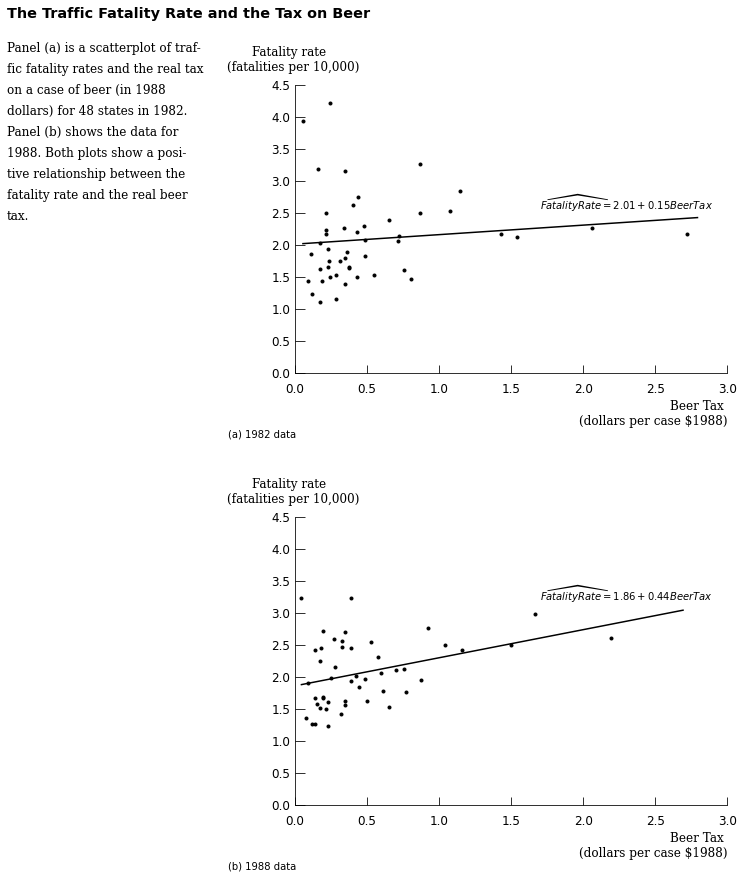

In [5]:
fig = plt.figure()

ax_1 = fig.add_axes([0,0,1,1])
ax_1.scatter('beertax', 'frate', data=f1982, color='black', marker='.')

ax_1.set_ylim(0,4.5)
ax_1.set_xlim(0,3)
ax_1.text(-0.5, 4.73, 'Fatality rate \n (fatalities per 10,000)', fontsize='large', fontfamily='serif', ma='center')
ax_1.set_xlabel('Beer Tax \n (dollars per case $1988)', loc='right', fontsize='large', fontfamily='serif')
ax_1.spines['top'].set_visible(False)
ax_1.spines['right'].set_visible(False)
ax_1.tick_params(axis='x', direction='in', pad=10, length=8, labelsize=12)
ax_1.tick_params(axis='y', direction='in', pad=5, length=10, labelsize=12)

x_1982 = np.array(f1982['beertax']).reshape(-1,1)
y_1982 = np.array(f1982['frate']).reshape(-1,1)

reg_1982 = LinearRegression().fit(x_1982, y_1982)

m = reg_1982.intercept_
b = reg_1982.coef_

max_num = max(f1982['beertax'])+0.08
min_num = min(f1982['beertax'])

x = np.arange(min_num, max_num,0.01).reshape(-1,1)

ax_1.plot(x, m+(b*x), color='black')
ax_1.text(1.7,2.55, r'$\widehat{FatalityRate} = 2.01 + 0.15BeerTax$')
ax_1.text(-0.47, -1, "(a) 1982 data")

##############################################################################

ax_2 = fig.add_axes([0,-1.5,1,1])
ax_2.scatter('beertax', 'frate', data=f1988, color='black', marker='.')

ax_2.set_ylim(0,4.5)
ax_2.set_xlim(0,3)
ax_2.text(-0.5, 4.73, 'Fatality rate \n (fatalities per 10,000)', fontsize='large', fontfamily='serif', ma='center')
ax_2.set_xlabel('Beer Tax \n (dollars per case $1988)', loc='right', fontsize='large', fontfamily='serif')
ax_2.spines['top'].set_visible(False)
ax_2.spines['right'].set_visible(False)
ax_2.tick_params(axis='x', direction='in', pad=10, length=8, labelsize=12)
ax_2.tick_params(axis='y', direction='in', pad=5, length=10, labelsize=12)

x_1988 = np.array(f1988['beertax']).reshape(-1,1)
y_1988 = np.array(f1988['frate']).reshape(-1,1)

reg_1988 = LinearRegression().fit(x_1988, y_1988)

m = reg_1988.intercept_
b = reg_1988.coef_

max_num = max(f1988['beertax'])+0.5
min_num = min(f1988['beertax'])

x = np.arange(min_num, max_num,0.01).reshape(-1,1)

ax_2.plot(x, m+(b*x), color='black')
ax_2.text(1.7,3.2, r'$\widehat{FatalityRate} = 1.86 + 0.44BeerTax$')
ax_2.text(-0.47, -1, "(b) 1988 data")

ax_1.text(-2, 2.4, 
          'Panel (a) is a scatterplot of traf-\nfic fatality rates and the real tax \non a case of beer (in 1988 \ndollars) for 48 states in 1982. \nPanel (b) shows the data for \n1988. Both plots show a posi- \ntive relationship between the \nfatality rate and the real beer \ntax.', 
          fontsize='large', fontfamily='serif', linespacing=1.8
         )
43333
ax_1.text(-2,5.55, 'The Traffic Fatality Rate and the Tax on Beer', fontsize='x-large', fontfamily='sans-serif', fontweight='bold')

plt.show()

In [6]:
f1982.head()

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,frate
0,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.0,...,309.437988,3942002.25,2.089996e+05,2.215534e+05,2.900001e+05,28516.0,9.7,57.799999,-0.022125,2.12836
7,az,1982,1.97,9.9,12309.069336,56.893295,0.214797,3.958900,4.91910,19.0,...,173.667999,2896996.50,1.410000e+05,1.563787e+05,2.180000e+05,19729.0,9.7,57.799999,-0.043182,2.49914
14,ar,1982,1.19,9.8,10267.302734,54.475857,0.650358,22.967199,0.32829,21.0,...,271.459015,2306998.50,1.220000e+05,1.212695e+05,1.570000e+05,16630.0,9.7,57.799999,-0.034734,2.38405
21,ca,1982,2.21,9.9,15797.135742,59.515930,0.107399,1.723100,1.67854,21.0,...,1379.130005,24785976.00,1.157002e+06,1.321004e+06,1.892998e+06,169999.0,9.7,57.799999,-0.011686,1.86194
28,co,1982,2.25,7.7,15082.338867,64.966736,0.214797,2.300000,1.82301,21.0,...,219.750000,3071998.75,1.430001e+05,1.699568e+05,2.460000e+05,23786.0,9.7,57.799999,0.012043,2.17448


In [7]:
f1988.head()

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,frate
6,al,1988,1.17,7.2,12368.624023,56.834530,1.501444,30.223301,0.43018,21.0,...,298.321991,4101992.25,2.010001e+05,1.930005e+05,2.629998e+05,39684.000000,5.5,62.300003,0.035392,2.49391
13,az,1988,1.68,6.3,14408.084961,60.497665,0.346487,3.564000,4.41399,21.0,...,238.233994,3488995.00,1.479999e+05,1.570007e+05,2.180000e+05,34247.000000,5.5,62.300003,0.026568,2.70565
20,ar,1988,0.99,7.7,11760.346680,57.366951,0.524543,23.170000,0.43018,21.0,...,208.850006,2395002.75,1.140000e+05,1.099991e+05,1.459999e+05,19219.000000,5.5,62.300003,0.033734,2.54697
27,ca,1988,1.72,5.3,18049.085938,63.783657,0.086622,1.794100,1.61578,21.0,...,1246.709961,28314028.00,1.126998e+06,1.227989e+06,1.770001e+06,241575.015625,5.5,62.300003,0.049020,1.90365
34,co,1988,1.74,6.4,15845.042969,65.304451,0.173244,2.300000,1.89382,21.0,...,132.949997,3301009.75,1.360000e+05,1.490010e+05,2.089997e+05,27664.998047,5.5,62.300003,0.008626,1.50560


## 10.2 Panel Data with Two Time Periods: "Before and After" Comparisons


In [8]:
delta_frate = np.array(f1988['frate']).reshape(-1,1) - np.array(f1982['frate']).reshape(-1,1)
delta_beertax = np.array(f1988['beertax']).reshape(-1,1) - np.array(f1982['beertax']).reshape(-1,1)

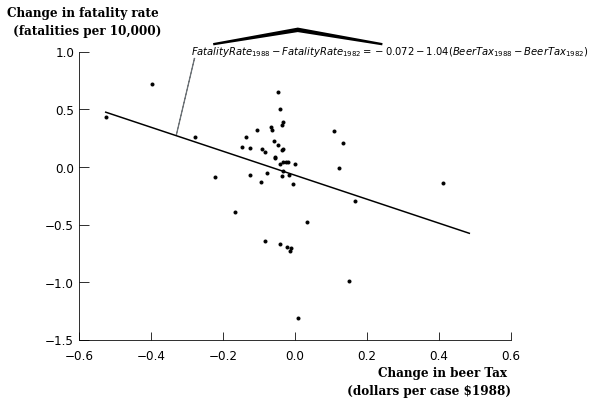

In [9]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.scatter(delta_beertax, delta_frate, color='black', marker='.')

reg_delta = LinearRegression().fit(delta_beertax, delta_frate)

max_num = max(delta_beertax)+0.08
min_num = min(delta_beertax)

m = reg_delta.intercept_
b = reg_delta.coef_
x = np.arange(min_num, max_num, 0.01).reshape(-1,1)

ax.plot(x, m+(b*x), color='black')


ax.set_ylim(-1.5, 1)
ax.set_xlim(-0.6, 0.6)

ax.text(-0.8, 1.15, 'Change in fatality rate \n (fatalities per 10,000)', fontsize='large', fontweight="bold", fontfamily='serif', ma='center', linespacing=1.5)
ax.set_xlabel('Change in beer Tax \n (dollars per case $1988)', loc='right', fontsize='large', fontweight="bold", fontfamily='serif', linespacing=1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', direction='in', pad=10, length=8, labelsize=12)
ax.tick_params(axis='y', direction='in', pad=5, length=10, labelsize=12)


ax.arrow(-0.33, 0.28, 0.05, 0.66, alpha=0.5)
ax.text(-0.29, 0.97, r'$\widehat{FatalityRate_{1988} - FatalityRate_{1982}}=-0.072-1.04(BeerTax_{1988} - BeerTax_{1982})$')


plt.show()

Unfortunately, some of these variables, such as the cultural acceptance of drinking and driving, might be very hard or even impossible to measure. 

If these factors remain constant over time in a given state, however, then another route is available. Because we have panel data, we can in effect hold these factors constant even though we cannot measure them. To do so, we use OLS regression with fixed effects. 

## 10.3 Fixed Effects Regression

Fixed effects regression is a method for controlling for omitted variables in panel data when the omitted variables vary across entities (states) but do not change over time. Unlike the "before and after" comparisons of Section 10.2, fixed effects regression can be used when there are two or more time observations for each entity. 

Consider the regression model in the equation with the dependent variable ***(FatalityRate)*** and observed regressor ***(BeerTax)*** denoted as $Y_{it}$ and $X_{it}$, respectively: 

$Y_{it} = \beta + \beta_{1}X_{it} + \beta_{2}Z_{i} + u_{it}$


where $Z_i$ is an unobserved variable that varies from one state to the next but does not change over time (for example, $Z_i$ represents cultural attitutes towards drinking and driving). **We want to estimate $\beta_i$, the effect on Y of X holding constant the unobserved state characteristics Z.** 

In [10]:
df.columns

Index(['state', 'year', 'spirits', 'unemp', 'income', 'emppop', 'beertax',
       'baptist', 'mormon', 'drinkage', 'dry', 'youngdrivers', 'miles',
       'breath', 'jail', 'service', 'fatal', 'nfatal', 'sfatal', 'fatal1517',
       'nfatal1517', 'fatal1820', 'nfatal1820', 'fatal2124', 'nfatal2124',
       'afatal', 'pop', 'pop1517', 'pop1820', 'pop2124', 'milestot', 'unempus',
       'emppopus', 'gsp', 'frate'],
      dtype='object')

In [11]:
df.head()

,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,frate
0,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,19.00,...,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125,2.12836
1,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,19.00,...,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558,2.34848
2,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,19.00,...,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798,2.33643
3,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,19.67,...,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490,2.19348
4,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,21.00,...,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143,2.66914


In [12]:
from category_encoders import OneHotEncoder

In [13]:
df['state'].unique()

array(['al', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms',
       'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'oh',
       'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va',
       'wa', 'wv', 'wi', 'wy'], dtype=object)

In [14]:
raw_df = df[['state', 'beertax', 'frate']]

In [15]:
raw_df.head()

,state,beertax,frate
0,al,1.539379,2.12836
1,al,1.788991,2.34848
2,al,1.714286,2.33643
3,al,1.652542,2.19348
4,al,1.609907,2.66914


In [16]:
OHE = OneHotEncoder(cols=['state'], use_cat_names=True)

In [17]:
encoded_df = OHE.fit_transform(raw_df)

C:\Users\shawnyoon\anaconda3\envs\traffic_fatalities\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [18]:
encoded_df.columns

Index(['state_al', 'state_az', 'state_ar', 'state_ca', 'state_co', 'state_ct',
       'state_de', 'state_fl', 'state_ga', 'state_id', 'state_il', 'state_in',
       'state_ia', 'state_ks', 'state_ky', 'state_la', 'state_me', 'state_md',
       'state_ma', 'state_mi', 'state_mn', 'state_ms', 'state_mo', 'state_mt',
       'state_ne', 'state_nv', 'state_nh', 'state_nj', 'state_nm', 'state_ny',
       'state_nc', 'state_nd', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut',
       'state_vt', 'state_va', 'state_wa', 'state_wv', 'state_wi', 'state_wy',
       'beertax', 'frate'],
      dtype='object')

In [19]:
encoded_df.head()

,state_al,state_az,state_ar,state_ca,state_co,state_ct,state_de,state_fl,state_ga,state_id,...,state_tx,state_ut,state_vt,state_va,state_wa,state_wv,state_wi,state_wy,beertax,frate
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.539379,2.12836
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.788991,2.34848
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.714286,2.33643
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.652542,2.19348
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.609907,2.66914


In [20]:
encoded_df.columns[1:49]

Index(['state_az', 'state_ar', 'state_ca', 'state_co', 'state_ct', 'state_de',
       'state_fl', 'state_ga', 'state_id', 'state_il', 'state_in', 'state_ia',
       'state_ks', 'state_ky', 'state_la', 'state_me', 'state_md', 'state_ma',
       'state_mi', 'state_mn', 'state_ms', 'state_mo', 'state_mt', 'state_ne',
       'state_nv', 'state_nh', 'state_nj', 'state_nm', 'state_ny', 'state_nc',
       'state_nd', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri',
       'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_vt',
       'state_va', 'state_wa', 'state_wv', 'state_wi', 'state_wy', 'beertax'],
      dtype='object')

In [21]:
x_cols = encoded_df.columns[1:49]

In [22]:
x_cols

Index(['state_az', 'state_ar', 'state_ca', 'state_co', 'state_ct', 'state_de',
       'state_fl', 'state_ga', 'state_id', 'state_il', 'state_in', 'state_ia',
       'state_ks', 'state_ky', 'state_la', 'state_me', 'state_md', 'state_ma',
       'state_mi', 'state_mn', 'state_ms', 'state_mo', 'state_mt', 'state_ne',
       'state_nv', 'state_nh', 'state_nj', 'state_nm', 'state_ny', 'state_nc',
       'state_nd', 'state_oh', 'state_ok', 'state_or', 'state_pa', 'state_ri',
       'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_vt',
       'state_va', 'state_wa', 'state_wv', 'state_wi', 'state_wy', 'beertax'],
      dtype='object')

In [23]:
y = encoded_df['frate']
x = encoded_df[x_cols]

In [24]:
fe_reg = LinearRegression().fit(x,y)

In [25]:
fe_reg.intercept_

3.477630106671823

In [26]:
fe_reg.coef_

array([-0.56772686, -0.65495158, -1.50946884, -1.48428042, -1.86225728,
       -1.30760203, -0.26813023,  0.52460299, -0.66902248, -1.96162256,
       -1.46154161, -1.54393218, -1.223216  , -1.21751698, -0.84711624,
       -1.10794738, -1.70643969, -2.10974622, -1.48452689, -1.89721306,
       -0.02907982, -1.29626171, -0.36039155, -1.52217786, -0.60077496,
       -1.25445437, -2.10574952,  0.42637496, -2.18667   , -0.29046505,
       -1.62343932, -1.67441932, -0.54506097, -1.16799987, -1.76746626,
       -2.26505428,  0.5571737 , -1.00372082, -0.87565863, -0.91747345,
       -1.16395046, -0.96604382, -1.29018324, -1.65952377, -0.89675402,
       -1.75926637, -0.22850373, -0.65587372])

Looking at the result above, I wondered if running an indiviual regression for each state would result in the same coefficient and the intercept as those of a regression with all the states combined. And the results were different - mathematical proof for it will be added in the future.

In [27]:
al_df = df[df["state"]=="al"]

In [28]:
al_x = al_df["beertax"]
al_y = al_df["frate"]

In [29]:
al_x = np.array(al_x).reshape(-1,1)
al_y = np.array(al_y).reshape(-1,1)

In [30]:
al_reg = LinearRegression().fit(al_x, al_y)

In [31]:
al_reg.intercept_

array([3.26313831])

In [32]:
al_reg.coef_

array([[-0.52378063]])

### The "entity-demeaned" OLS algorithm

$\tilde{Y_{it}} = \beta_1\tilde{X_{it}}+\tilde{u_{it}}$

$Y_{it}-\bar{Y_i} = \beta_1(X_{it}-\bar{X_i}) + (u_{it} - \bar{u_i})$

In [33]:
ed_df = df.copy()

In [34]:
groupby_df = ed_df.groupby(["state"]).mean()[["beertax","frate"]]

In [35]:
# gropuby function reorders the order of the states -> This causes problem when we demean. 
# So, I reindex according to the order of the original dataframe. 

state_order = ed_df.state.unique()
groupby_df = groupby_df.reindex(index=state_order)

In [36]:
mean_bt_i = groupby_df["beertax"]
mean_fr_i = groupby_df["frate"]

In [37]:
mean_bt_list = []
for i in mean_bt_i:
    for m in range(7):
        mean_bt_list.append(i)
        
mean_fr_list = []
for i in mean_fr_i:
    for m in range(7):
        mean_fr_list.append(i)

In [38]:
mean_bt = pd.Series(mean_bt_list)
mean_fr = pd.Series(mean_fr_list)

In [39]:
ed_df["dm_beertax"] = ed_df["beertax"] - mean_bt
ed_df["dm_frate"] = ed_df["frate"] - mean_fr

In [40]:
ed_df[["state", "year", "beertax", "frate", "dm_beertax", "dm_frate"]].head(10)

,state,year,beertax,frate,dm_beertax,dm_frate
0,al,1982,1.539379,2.12836,-0.084413,-0.284267
1,al,1983,1.788991,2.34848,0.165198,-0.064147
2,al,1984,1.714286,2.33643,0.090493,-0.076197
3,al,1985,1.652542,2.19348,0.028750,-0.219147
4,al,1986,1.609907,2.66914,-0.013886,0.256513
5,al,1987,1.560000,2.71859,-0.063793,0.305963
6,al,1988,1.501444,2.49391,-0.122349,0.081283
7,az,1982,0.214797,2.49914,-0.096243,-0.206760
8,az,1983,0.206422,2.26738,-0.104618,-0.438520
9,az,1984,0.296703,2.82878,-0.014337,0.122880


In [41]:
x = np.array(ed_df["dm_beertax"]).reshape(-1,1)
y = np.array(ed_df["dm_frate"]).reshape(-1,1)

ed_reg = LinearRegression(fit_intercept=False).fit(x,y)

In [42]:
ed_reg.intercept_

0.0

In [43]:
ed_reg.coef_

array([[-0.65587372]])

## 10.4 Regression with Time Fixed Effect

Just as fixed effects for each entitiy can control for variables that are constant over time but differ across entities, so can time fixed effects control for variables that are constant across entities but evolve over time. 

Because safety improvements in new cars are introduced nationally, they serve to reduce traffi fatatlities in all states. So, it is plausible to think of automobile safety as an omitted variable that changes over time but has the same value for all states. 

$Y_{it} = \beta_0 + \beta_{1}X_{it} + \beta_{2}Z_{i} + \beta_{3}S_t + u_{it}$


### Let's do both Entity and Time Fixed Effects

In [44]:
ETF_df = df.copy()
ETF_df = ETF_df[['state', 'year', 'frate', 'beertax']]

In [45]:
OHE = OneHotEncoder(cols=['state', 'year'], use_cat_names=True)
encoded_df = OHE.fit_transform(ETF_df)

C:\Users\shawnyoon\anaconda3\envs\traffic_fatalities\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [46]:
encoded_df.columns

Index(['state_al', 'state_az', 'state_ar', 'state_ca', 'state_co', 'state_ct',
       'state_de', 'state_fl', 'state_ga', 'state_id', 'state_il', 'state_in',
       'state_ia', 'state_ks', 'state_ky', 'state_la', 'state_me', 'state_md',
       'state_ma', 'state_mi', 'state_mn', 'state_ms', 'state_mo', 'state_mt',
       'state_ne', 'state_nv', 'state_nh', 'state_nj', 'state_nm', 'state_ny',
       'state_nc', 'state_nd', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx', 'state_ut',
       'state_vt', 'state_va', 'state_wa', 'state_wv', 'state_wi', 'state_wy',
       'year_1982.0', 'year_1983.0', 'year_1984.0', 'year_1985.0',
       'year_1986.0', 'year_1987.0', 'year_1988.0', 'frate', 'beertax'],
      dtype='object')

In [47]:
states = encoded_df.columns[1:48]
years = encoded_df.columns[49:55]

In [48]:
binary_vars = np.array(states.append(years))
var_cols = np.append(binary_vars, ['beertax'])

In [49]:
y = encoded_df['frate']
x = encoded_df[var_cols]

In [50]:
ETF_reg = LinearRegression().fit(x,y)

In [51]:
ETF_reg.intercept_

3.511374842643843

In [52]:
len(var_cols)

54

In [53]:
len(ETF_reg.coef_)

54

In [54]:
var_cols

array(['state_az', 'state_ar', 'state_ca', 'state_co', 'state_ct',
       'state_de', 'state_fl', 'state_ga', 'state_id', 'state_il',
       'state_in', 'state_ia', 'state_ks', 'state_ky', 'state_la',
       'state_me', 'state_md', 'state_ma', 'state_mi', 'state_mn',
       'state_ms', 'state_mo', 'state_mt', 'state_ne', 'state_nv',
       'state_nh', 'state_nj', 'state_nm', 'state_ny', 'state_nc',
       'state_nd', 'state_oh', 'state_ok', 'state_or', 'state_pa',
       'state_ri', 'state_sc', 'state_sd', 'state_tn', 'state_tx',
       'state_ut', 'state_vt', 'state_va', 'state_wa', 'state_wv',
       'state_wi', 'state_wy', 'year_1983.0', 'year_1984.0',
       'year_1985.0', 'year_1986.0', 'year_1987.0', 'year_1988.0',
       'beertax'], dtype=object)

In [55]:
ETF_reg.coef_

array([-0.54686232, -0.63852989, -1.48519185, -1.46153456, -1.84012926,
       -1.28426072, -0.26005336,  0.51162235, -0.64895611, -1.93850243,
       -1.44014065, -1.52428293, -1.20430819, -1.19478813, -0.83365927,
       -1.09424487, -1.68406811, -2.08802111, -1.46649791, -1.87649325,
       -0.01991255, -1.27539508, -0.33977453, -1.50291357, -0.57815576,
       -1.23892952, -2.08121733,  0.44610528, -2.16288237, -0.28507207,
       -1.60375574, -1.65473573, -0.53361421, -1.14540219, -1.74574115,
       -2.24172999,  0.55358402, -0.98820245, -0.85467057, -0.89855442,
       -1.14972188, -0.95037946, -1.27519513, -1.63712993, -0.8777372 ,
       -1.73592506, -0.20346117, -0.07990287, -0.07242056, -0.12397632,
       -0.03786447, -0.05090206, -0.05180381, -0.63997999])

## 13.3 Experimental Estimates of the Effect of Class Size Reductions

In this section we return to a question addressed in Part II: What is the effect on test scores of reducing class size in the early grades? In the late 1980s, Tennessee conducted a large, multimillion-dollar randomized controlled experiment to ascertain whether class size reduction was an effective way to improve elementary education. The results of this experiment have strongly influenced our understanding of the effect of class size reductions. 

### Experimental Design

The Tennessee class size reduction experiment, known as Project STAR (Student Teacher Achievement Ratio), was a 4-year experiment design to evaluate the effect on learning of small class sizes. The study compared three different class arrangements for kindergarten through third grade: a regular class size, with 22 to 25 students per class, a single teacher, and no aides; a small class size, with 13 to 17 students per class and no aide; and a regular-sized class plus a teacher's aide. 

### Analysis of the STAR Data

Because there are two treatment groups - small class and regular class with aide - the regression version of the differences estimator needs to be modified to handle the two treatment groups and the control group. This modificaiton is done by introducing two binary variables, one indicating whether the student is in a small class and another indicating whether the student is in a regular-sized class with an aide, which leads to the population regression model 

$Y_i = \beta_0 + \beta_1SmallClass_i + \beta_2RegAide_i + u_i$ 

**Treatment Group_1 (Small Class w/o Aide)** 

$Y_i = \beta_0 + \beta_1(1) + \beta_2(0) + u_i$ 

**Control Group (Reg Class w/o Aide)** 

$Y_i = \beta_0 + \beta_1(0) + \beta_2(0) + u_i$ 

**Treatment Group_2 (Reg Class w Aide)** 

$Y_i = \beta_0 + \beta_1(0) + \beta_2(1) + u_i$ 

## I have a question on p.483 (524) 

I don't understand "the gender of the student taking the test is not randomly assigned). 

### 13.4 Quasi-Experiments

The statistical insights and methods of randomized controlled experiments can carry over to nonexperimental settings. In a **quasi-experiment**, also called a **natural experiment**, randomness is introduced by variations in individual circumstances that make it appear as if the treatment is randomly assigned. 

# Okay, I thinks it be helpful to look at randomization and interaction variables 


p. 485 (526) 

## Comparison of the Observational and Experimental Estimates of Class Size Effects

Part II presented multiple regression estimates of the class size effect based on observational data for California and Massachusetts school districts. In those data, class size was not randomly assigned, but instead was determined by local school officials trying to balance educational objectives against budgetary realities. How do those observational estimates compare with the experimental estimates from Project STAR? 

- Okay, randomization is done. 

- Let's do non-linear (which is interaction) p. 252 (293)



# The Differences-in-Differences Estimator (A.K.A DID) 

p.490 (531)

Let's first study 

1. Differences estimator p.472 (513) 
* Experiment (519)

### The Differences-in-Differences Estimator

If the treatment in a quasi-experiment is "as if" randomly assigned, conditional on some observed variables W, then the treatment effect can be estimated using the differences regression (13.2).

Differences Regression: 

$Y_i = \beta_0 + \beta_1X_i + \beta_2W_{1i} + ....+ \beta_{1+r}W_{ri}+ u_i$

### 13.2 Threats to Validity of Experiments


# Chapter 9: Assessing Studies Based on Multiple Regression

## 9.1 Internal and External Validity 

The concepts of internal and external validity, defined in Key Concept 9.1, provide a framework for evaluating whether a statistical or econometric study is useful for answering a specific question of interest. 

Internal and external validity distinguish between the **population and setting studied** and **the population and setting to which the results are generalized**. The **population studied** is the population of entitities - people, companies, school districts, and so forth - from which the sample was drawn. **The population to which the results are generalized**, or the population of interest, is the population of entities to which the causal inferences from the study are to be applied. For example, a high school (grades 9 through 12) principal might want to generalize our findings on class sizes and test scores in California elementary school districts (the population studied) to the population of high schools (the population of interest). 

**Internal and External Validity:** 
A statistical analysis is said to have internal validity if the statistical inferences about causal effects are valid for the population being studied. The analysis is said to have external validity if its inferences and conclusions can be generalized from the population and setting studied to other populations and settings. 


#### Threats to Internal Validity 

Internal validity has two components. First, the estimator of the causal effect should be unbiased and consistent. 

**I understand unbiasedness. For the consistency of an estimator, I think it means that as the sample size gets bigger, the value of the estimator gets closer to the true population beta.** So the consistency ahs to do with what regression method I am using. Refer back to Concept 6.4.

Second, hypothesis tests should have the desired significance level, and confidence intervals should have the desired confidence level. 

#### Threats to External Validity

Potential threats to external validity arise from differences between the population and setting studided and the poulation and setting of interest. 

**Differences in populations:** Differences between the population studied and the population of interest can pose a threat to external validity. For example, laboratory studies of the toxic effects of chemicals typically use animal populations like mice (the population studied), but the resutls are used to write health and safety regulations for human populations (the population of interest). Whether mice and men differ sufficiently to threaten the external validity of such studies is a matter of debate. 

More generally, the true causal effect might not be the same in the population studied and the population of interest. This could be because the population was chosen in a way that makes it different from the population of interest, because of differences in characteristics of the populations, because of geographical differences, or because the study is out of date. 

**Differences in settings:** Even if the population being studied and the population of interest are identical, it might not be possible to generalize the study results if the settings differ. For example, a study of the effect on college binge drinking of an antidrinking advertising campaign might not generalize to another identical group of college students if the legal penalities for drinking at the two colleges differ. In this case, the legal setting in which the study was conducted differs from the legal setting to which its results are applied. 

**How to assess the external validity of a study** External validity must be judge using specific knowledge of the populations and settings studided and those of interest. Important differences between the two will cast doubt on the external validity of the study. 

Sometimes there are two or more studies on different but related populations. If so, the external validity of both studies can be checked by comparing their results. For example, in Section 9.4 we analyze test score and class size data for elementary school districts in Massachusetts and compare the Massachusetts and California results. In general, similar findings in two or more studies bolster claims to external validity, while differences in their findings that are not readily explained cast doubt on their external validity. 



## 9.2 Threats to Internal Validity of Multiple Regression Analysis

### Omitted Variable Bias 

#### Solutions to omitted variable bias when adequate control variables are not available. 

Adding an omitted variable to a regression is not an option if you do not have data on that variable and if there are no adequate control variables. Still, there are three other ways to solve omitted variable bias. Each of these three solutions circumvents omitted variable bias through the use of different types of data. 

1. The first solution is to use data in which the same observational unit is observed at different point in time. For example, test score and related data might be collected for the same districts in 1995 and again in 2000. Data in this form are called panel data. As explained in Chapter 10, panel data make it possible to control for unobserved omitted variables as long as those omitted variables do not change over time. 


2. The second solution is to use instrumental variables regression. This method relies on a new variable, called an instrumental variable. Instrumental variables regression is discussed in Chapter 12. 


3. The third solution is to use a study design in which the effect of interest (for example, the effect of reducing class size on student achievement) is studied using a randomized controlled experiment. Randomized controlled experiments are discussed in Chapter 13. 

## 9.4 Example: Test Scores and Class Size

The framework of internal and external validity helps us to take a critical look at what we have learned - and what we have not - from our analysis of the CAlifornia test score data. 

### External Validity 

Whether the California analysis can be generalized - that is, whether it is externally valid - depends on the population and setting to which the gneralization is made. Here, we consider whether the results can be generalized to performance on other standardized tests in other elementary public school districts in the United States. 

Section 9.1 noted that having more than one study on the same topic provides an opportunity to assess the external validity of both studies by comparing their results. In the case of test scores and class size, other comparable data sets are, in fact, available. In this section, we examine a different data set, based on standardized test reuslts for fourth graders in 220 public school districts in MAssachusetts in 1998. Both the Massachusetts and California tests are broad measures of student knowledge and acadmics skills, although the details differ. Similarly, the organization of classroom instruction is broadly similar at the elementary school level in the two states, although aspects of elementary school funding and curriculum differ. Thus finiding similar results about the effect of the student-teacher ratio on test performance in the California and Massachusetts data would be evidence of external validity of the findings in California. Conversely, finding different results in the two states would raise questions about the internal or external validity of at least one of the studies. 

Because the researcher does not have control over the randomization, however, some differences might remain between the treatment and control groups even after controlling for W. 

One way to adjust for those remaining differences between the two groups is to compare not the outcomes Y, but the change in the outcomes pre- and post-treatment, thereby adjusting for differences in pretreatment values of Y in the two groups. 